# Inference test

In [11]:
import sys
sys.path.insert(0, '../')

import numpy as np
import torch
from torch.autograd import Variable
from FuseNet import FuseNet, CrossEntropy2d
from Solver_FuseNet import Solver_SS
import torch.nn.functional as F
from utils.data_utils_class import get_data

from dataloaders.NYUDv2Loader import *

%matplotlib inline
from utils.visual_utils import *
gpu_device = 1

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [20, 10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gpu_device = 2
torch.cuda.set_device(gpu_device)

In [3]:
data_visualizer = DataVisualizer()

v_loader = NYUDv2Loader('/home/dongwonshin/Desktop/Datasets/NYUDv2/', split='val', is_transform=True, img_norm=True, img_size=(240,320))
val_loader = data.DataLoader(v_loader, batch_size=4, num_workers=16)

In [4]:
model = FuseNet(14).cuda()

In [5]:
checkpoint = torch.load('../models/nyu/checkpoint25.pth.tar')
model.load_state_dict(checkpoint['state_dict']) 

In [7]:
for data in val_loader:

    rgb_inputs  = Variable(data[0].cuda(gpu_device))
    d_inputs    = Variable(data[1].cuda(gpu_device))
    labels      = Variable(data[2].cuda(gpu_device))
    
    result = model.forward(rgb_inputs, d_inputs)    
    break;

Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f546ea83850>> ignored


In [ ]:
label_results = np.argmax(result.cpu().detach().numpy(),axis=1)

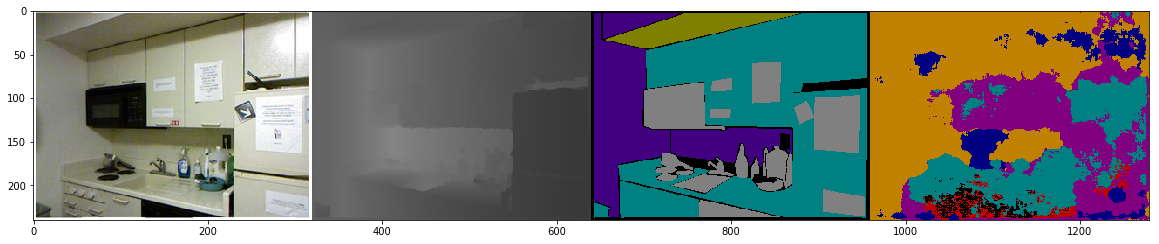

In [14]:
idx = 1
data_visualizer.visualize_all(rgb_inputs[idx], d_inputs[idx], labels[idx], label_results[idx])